<a href="https://colab.research.google.com/github/Daksh110306/Task-No.3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
data = pd.read_csv('Housing.csv')

In [ ]:
print("Data Shape:", data.shape)
print(data.head())

Data Shape: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [ ]:
print(X_train.shape)
print(y_train.shape)


(436, 12)
(436,)


In [ ]:
if X_train.isnull().any().any():
    X_train = X_train.fillna(X_train.mean())
    X_test  = X_test.fillna(X_train.mean())

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test,  drop_first=True)


In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 970043.4039201636
MSE: 1754318687330.6638
R²: 0.6529242642153184


In [ ]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': regressor.coef_
})


In [ ]:
print(coef_df)

                            feature   coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


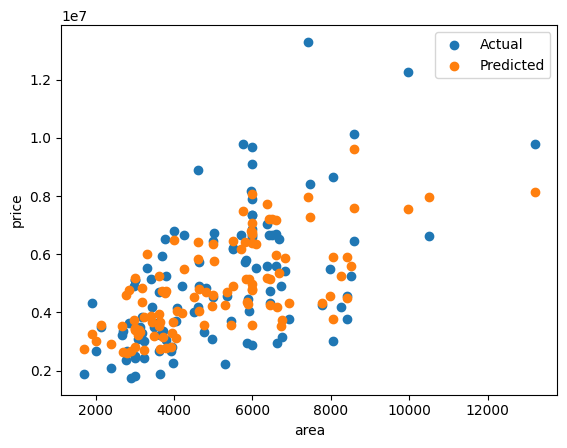

In [ ]:
if 'area' in X_train.columns:
    import matplotlib.pyplot as plt
    plt.scatter(X_test['area'], y_test, label='Actual')
    plt.scatter(X_test['area'], y_pred,  label='Predicted')
    plt.xlabel('area')
    plt.ylabel('price')
    plt.legend()
    plt.show()

In [ ]:
from google.colab import files
files.download('Housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>